In [14]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [15]:
import numpy as np
import pandas as pd

In [16]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [17]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [18]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [19]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [20]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [21]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [22]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)

# Exploratory Climate Analysis

<IPython.core.display.Javascript object>


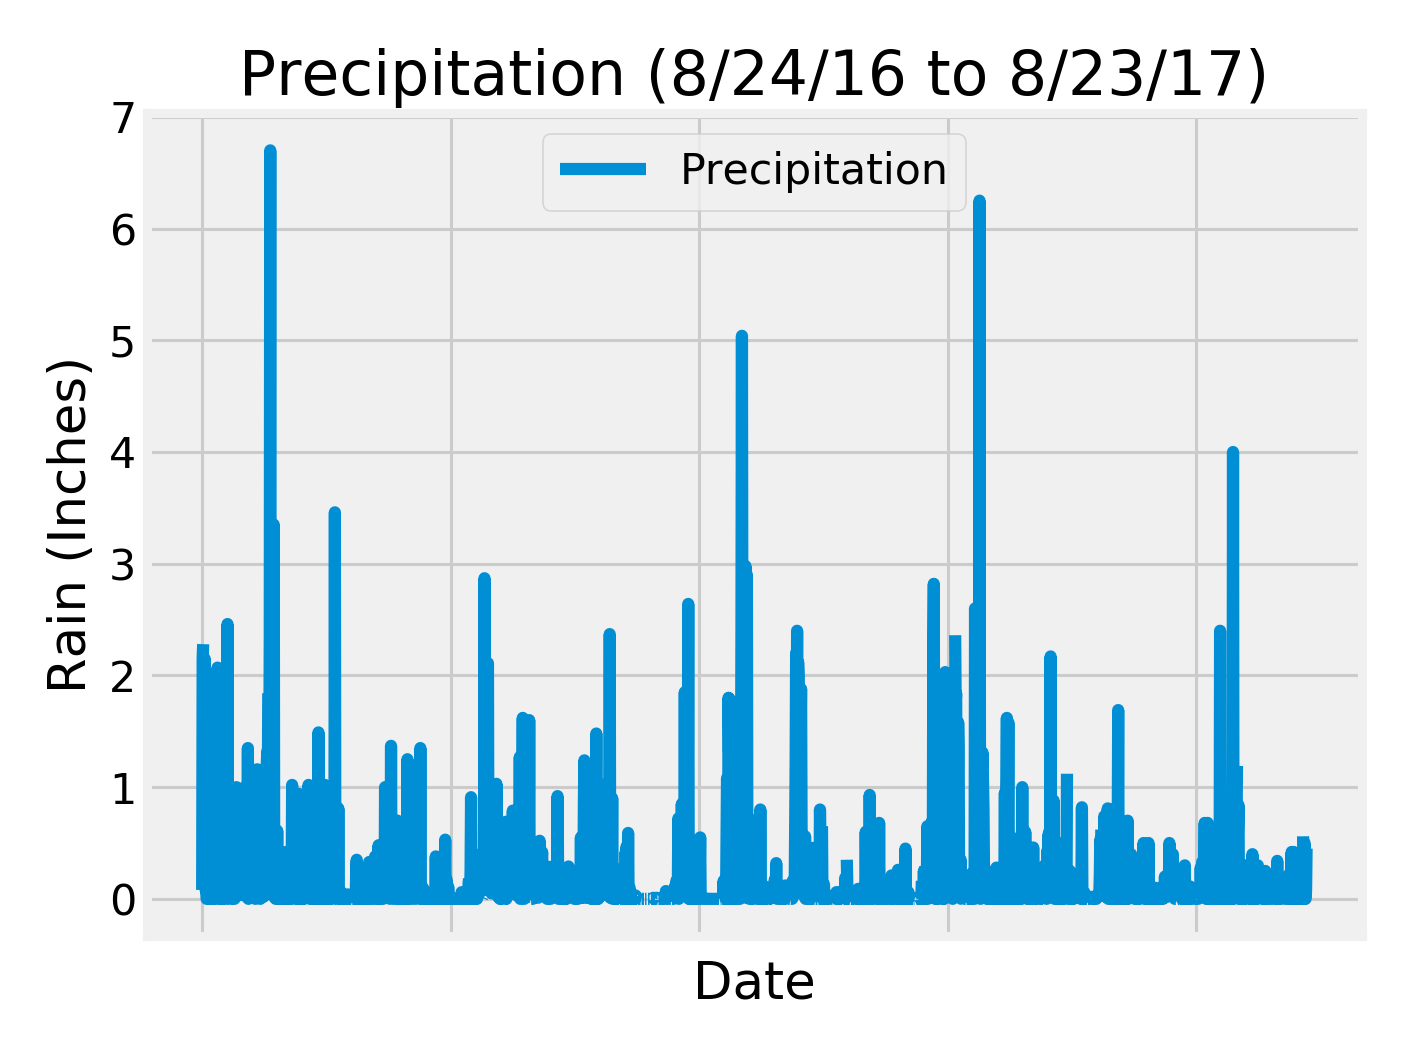

In [52]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from today

last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
rain = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > year_ago).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
rain_df = pd.DataFrame(rain).set_index("date")
rain_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
rain_df.plot()
plt.xlabel("Date")
plt.ylabel("Rain (Inches)")
plt.title("Precipitation (8/24/16 to 8/23/17)")
plt.legend(["Precipitation"])
plt.tight_layout()
# Rotate the xticks for the dates
plt.xticks(rotation=45)
plt.show()

In [39]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [42]:
# How many stations are available in this dataset?
total_stations = session.query(Measurement).group_by(Measurement.station).count()
print(total_stations)

9


In [43]:
# What are the most active stations?
# List the stations and the counts in descending order.
busy_stations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
               order_by(func.count(Measurement.tobs).desc()).all()
print(busy_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [96]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
busiest_station = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs))\
.filter(Measurement.station == busy_stations[0][0]).all()
print(busiest_station)

[(54.0, 71.66378066378067, 85.0)]


<IPython.core.display.Javascript object>


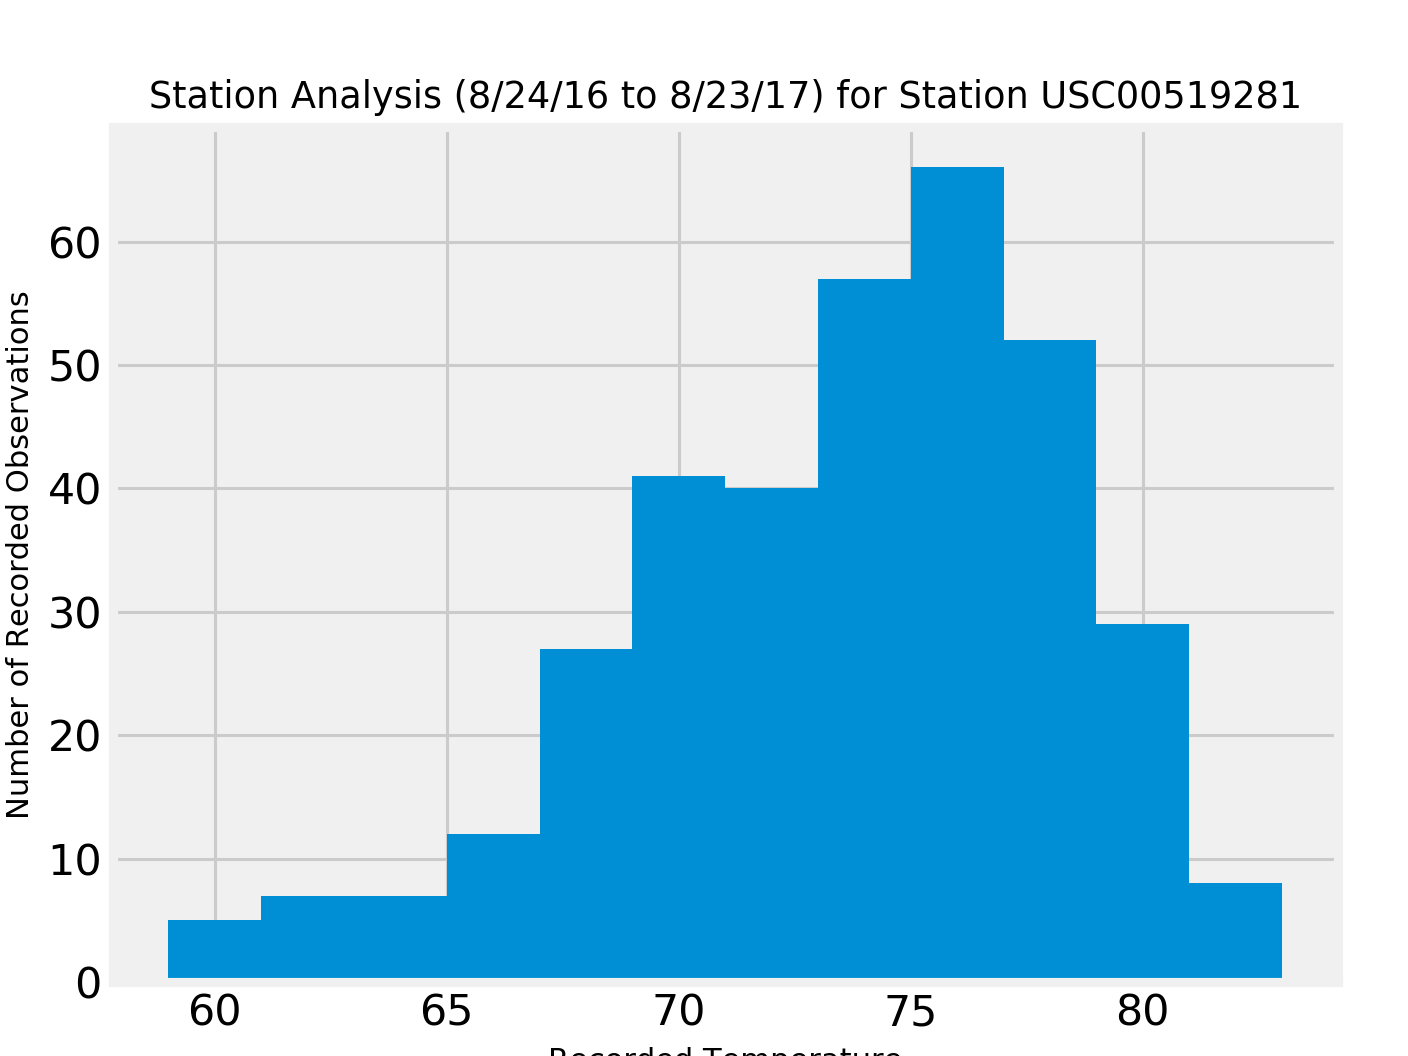

In [61]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
busystation_temp_data = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == busy_stations[0][0]).\
    filter(Measurement.date > year_ago).\
    order_by(Measurement.date).all()
    
temp_df=pd.DataFrame(busystation_temp_data)
plt.hist(temp_df['tobs'],12)
plt.xlabel("Recorded Temperature", fontsize = 10)
plt.ylabel("Number of Recorded Observations", fontsize = 10)
plt.title("Station Analysis (8/24/16 to 8/23/17) for Station " + busy_stations[0][0], fontsize= 12)
plt.show()